In [399]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Tablica seasons

In [400]:
seasons = pd.read_csv("seasons.csv")
seasons.shape

(19, 7)

Uz pomoć funkcije shape dobili smo broj redaka i stupaca u tablici, a fja head će nam prikazati kako izgleda prvih 5 redaka

In [401]:
seasons.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


Zatim s funkcijama describe i info dobijemo detaljan pregled vrijednosti i tipova podataka u tablici

In [402]:
seasons.describe()

,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


Vidimo da za svaku godinu imamo razlicitu vrijednost, odnosno monoton raste, dakle mozemo taj stupac tablice izbrisati jer se to lako izgenerira ako bude trebalo kasnije

In [403]:
seasons.drop((['years']), axis=1, inplace=True)

In [404]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   dayzero  19 non-null     object
 2   regionW  19 non-null     object
 3   regionX  19 non-null     object
 4   regionY  19 non-null     object
 5   regionZ  19 non-null     object
dtypes: object(6)
memory usage: 1.0+ KB


Nadalje treba provjeriti atribute s null vrijednostima

In [405]:
seasons.isna().sum()

season     0
dayzero    0
regionW    0
regionX    0
regionY    0
regionZ    0
dtype: int64

S obzirom da je jednostavniji rad s int podacima, gdje to možemo zamijenit ćemo, kao na primjer season i region, a dayezero postavit ćemo na datetime

In [406]:
mapping_for_season = {season: i for i, season in enumerate(pd.unique(seasons[['season']].values.ravel('K')))}
mapping_for_region = {region: i for i, region in
              enumerate(pd.unique(seasons[['regionW', 'regionX', 'regionY', 'regionZ']].values.ravel('K')))}
seasons['season'] = seasons['season'].map(mapping_for_season)
seasons['regionW'] = seasons['regionW'].map(mapping_for_region)
seasons['regionX'] = seasons['regionX'].map(mapping_for_region)
seasons['regionY'] = seasons['regionY'].map(mapping_for_region)
seasons['regionZ'] = seasons['regionZ'].map(mapping_for_region)

seasons.head()

,season,dayzero,regionW,regionX,regionY,regionZ
0,0,10/30/1995,0,1,4,5
1,1,10/28/1996,0,4,1,5
2,2,10/27/1997,0,5,1,6
3,3,10/26/1998,0,1,6,5
4,4,11/01/1999,1,5,0,6


In [407]:
seasons['dayzero'] = pd.to_datetime(seasons['dayzero'])

In [408]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   season   19 non-null     int64         
 1   dayzero  19 non-null     datetime64[ns]
 2   regionW  19 non-null     int64         
 3   regionX  19 non-null     int64         
 4   regionY  19 non-null     int64         
 5   regionZ  19 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.0 KB


Vidimo da se dType promijenio u int, a za dayzero u datetime

## Tablica teams

In [409]:
teams = pd.read_csv('teams.csv')

In [410]:
teams.shape

(356, 2)

In [411]:
teams.head()

,id,name
0,501,Abilene Chr
1,502,Air Force
2,503,Akron
3,504,Alabama
4,505,Alabama A&M


In [412]:
teams.describe()

,id
count,356.000000
mean,678.500000
std,102.912584
min,501.000000
25%,589.750000
50%,678.500000
75%,767.250000
max,856.000000


In [413]:
teams.isna().sum()

id      0
name    0
dtype: int64

In [414]:
teams.nunique()

id      356
name    356
dtype: int64

Kao što je i ocekivano tablica teams ima sve unique vrijednosti jer su id-jevi i imena timova unikatna, no nećemo brisati id-jeve jer će nam trebati kasnije za povezivanje

## Tablica tourney_results

In [415]:
tourney_results = pd.read_csv('tourney_results.csv')

In [416]:
tourney_results.shape

(1156, 7)

In [417]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


In [418]:
tourney_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


In [419]:
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   object 
 1   daynum  1156 non-null   int64  
 2   wteam   1156 non-null   int64  
 3   wscore  1156 non-null   int64  
 4   lteam   1156 non-null   int64  
 5   lscore  1156 non-null   int64  
 6   numot   585 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 63.3+ KB


In [420]:
tourney_results.isna().sum()

season      0
daynum      0
wteam       0
wscore      0
lteam       0
lscore      0
numot     571
dtype: int64

Vidimo da stupac numot(number of extra times) je skoro u 50% slučajeva null odnosno nedefiniran, kada bismo izbacili retke gdje je numot null to ne bi bilo ispravno jer bi izgubili više od 50% zapisa, ako zamijenimo nedostajuće vrijednosti srednjom vrijednosti također ne bi bilo moguće jer je srednja vrijednost 0.07,a ovo je cjelobrojni podatak, najmanje štete nam pravi ako cijeli stupac maknemo i obrišemo jer numot nam kazuje da je utakmica bila vrlo izjednačena a to možemo vidjeti iz samog rezultat

In [421]:
tourney_results.drop((['numot']), axis=1, inplace=True)

In [422]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore
0,A,136,515,86,729,80
1,A,136,559,68,555,59
2,A,136,576,75,666,63
3,A,136,581,75,577,60
4,A,136,604,81,551,74


Kao što smo radili u tablici seasons tako i ovdje moramo sezone mapirati kako bi bile int odnosno monotono rastući brojevi, možemo iskoristiti isti mapper

In [423]:
tourney_results['season'] = tourney_results['season'].map(mapping_for_season)

In [424]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore
0,0,136,515,86,729,80
1,0,136,559,68,555,59
2,0,136,576,75,666,63
3,0,136,581,75,577,60
4,0,136,604,81,551,74


In [425]:
tourney_results.nunique()

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
dtype: int64

## Tablica tourney_seeds

In [426]:
tourney_seeds = pd.read_csv('tourney_seeds.csv')

In [427]:
tourney_seeds.shape

(1242, 3)

In [428]:
tourney_seeds.head()

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729


In [429]:
tourney_seeds.describe()

,team
count,1242.000000
mean,685.844605
std,103.133122
min,502.000000
25%,603.000000
50%,680.000000
75%,783.000000
max,853.000000


Ovdje također mapiramo atribut season s istim mapperom što smo već koristili za season stupac

In [430]:
tourney_seeds['season'] = tourney_seeds['season'].map(mapping_for_season)

In [431]:
tourney_seeds.head()

,season,seed,team
0,0,W01,663
1,0,W02,603
2,0,W03,796
3,0,W04,660
4,0,W05,729


In [432]:
tourney_seeds.isna().sum()

season    0
seed      0
team      0
dtype: int64

Stupac seed se sastoji od dva dijela, dakle oznake W, E, X, Y koja označava regiju iz koje je tim, te broja 01-16 koji označava seed tima unutar te regije. Primjećujemo da bi to mogli logički razbiti u 2 stupca, seed_region i seed_placing kako bismo lakše kasnije radili klasifikaciju te ćemo promjeniti tip podatka za seed_placing u int

In [433]:
tourney_seeds['seed_region'] = tourney_seeds['seed'].str[0]
tourney_seeds['seed_placing'] = tourney_seeds['seed'].str[1:3]
tourney_seeds.drop((['seed']), axis=1, inplace=True)
tourney_seeds['seed_placing'] = tourney_seeds['seed_placing'].astype(int)


In [434]:
tourney_seeds.head()

,season,team,seed_region,seed_placing
0,0,663,W,1
1,0,603,W,2
2,0,796,W,3
3,0,660,W,4
4,0,729,W,5


Znamo da trebamo int tipove podataka, tako da moramno i seed_region mapirati na brojčane vrijednosti

In [435]:
mapping_for_seed_region = {seed_region: i for i, seed_region in enumerate(pd.unique(tourney_seeds[['seed_region']].values.ravel('K')))}

tourney_seeds['seed_region'] = tourney_seeds['seed_region'].map(mapping_for_seed_region)
tourney_seeds.head()

,season,team,seed_region,seed_placing
0,0,663,0,1
1,0,603,0,2
2,0,796,0,3
3,0,660,0,4
4,0,729,0,5


In [436]:
tourney_seeds.nunique()

season           19
team            262
seed_region       4
seed_placing     16
dtype: int64

## Tablica tourney_slots

In [437]:
tourney_slots = pd.read_csv('tourney_slots.csv')

In [438]:
tourney_slots.shape

(1223, 4)

In [439]:
tourney_slots.head()

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


In [440]:
tourney_slots.isna().sum()

season        0
slot          0
strongseed    0
weakseed      0
dtype: int64

In [441]:
tourney_slots['season'] = tourney_slots['season'].map(mapping_for_season)
tourney_slots.head()

,season,slot,strongseed,weakseed
0,0,R1W1,W01,W16
1,0,R1W2,W02,W15
2,0,R1W3,W03,W14
3,0,R1W4,W04,W13
4,0,R1W5,W05,W12


Sada ćemo iz stupca slot dobiti stupac round koji će predstavljati rundu turnira jer R1 znači prva runda, R2 druga itd..

In [442]:
tourney_slots['round'] = tourney_slots['slot'].str[1:2]
tourney_slots.head()

,season,slot,strongseed,weakseed,round
0,0,R1W1,W01,W16,1
1,0,R1W2,W02,W15,1
2,0,R1W3,W03,W14,1
3,0,R1W4,W04,W13,1
4,0,R1W5,W05,W12,1


S obzirom da se u polufinalu i finalu mijenja format zapisa, odnosno nije vise R5W4 npr nego je R5WZ i za finale R6CH, ne možemo razdvojiti stupce strongseed i weakseed da dobijemo favorita i regiju i ne možemo iz slota dobiti favorita također

## Tablica regular_season_results

In [443]:
regular_season_results = pd.read_csv('regular_season_results.csv')

In [444]:
regular_season_results.shape

(91224, 8)

In [445]:
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


In [446]:
regular_season_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


In [447]:
regular_season_results.isna().sum()

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

Mijenjamo season stupac da bude brojčana vrijednost također brišemo stupac numot

In [448]:
regular_season_results['season'] = regular_season_results['season'].map(mapping_for_season)
regular_season_results.drop((['numot']), axis=1, inplace=True)
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc
0,0,16,511,91,647,57,H
1,0,16,515,75,812,67,H
2,0,16,606,87,658,67,H
3,0,16,670,73,573,65,H
4,0,16,721,99,632,68,H


In [449]:
regular_season_results.nunique()

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
dtype: int64

Vidimo da wloc ima samo 3 vrijednosti 'H', 'A' i 'N' što jednostavno možemo zamijeniti cjelobrojnim vrijednostima zbog klasifikacije, a za to ćemo koristiti LabelEncoder

In [450]:
le = LabelEncoder()
le.fit(regular_season_results.loc[:, 'wloc'])
regular_season_results.loc[:, 'wloc'] = le.transform(regular_season_results.loc[:, 'wloc'])
regular_season_results['wloc'] = regular_season_results['wloc'].astype(int)
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc
0,0,16,511,91,647,57,1
1,0,16,515,75,812,67,1
2,0,16,606,87,658,67,1
3,0,16,670,73,573,65,1
4,0,16,721,99,632,68,1


In [451]:
regular_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  91224 non-null  int64
 1   daynum  91224 non-null  int64
 2   wteam   91224 non-null  int64
 3   wscore  91224 non-null  int64
 4   lteam   91224 non-null  int64
 5   lscore  91224 non-null  int64
 6   wloc    91224 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 4.5 MB


## Vizualizacija podataka

In [452]:
X = pd.merge(seasons, tourney_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')
X.head()

,season,dayzero,regionW,regionX,regionY,regionZ,daynum,wteam,wscore,lteam,lscore,id,name
0,0.0,1995-10-30,0.0,1.0,4.0,5.0,136.0,515.0,86.0,729.0,80.0,515.0,Arkansas
1,0.0,1995-10-30,0.0,1.0,4.0,5.0,138.0,515.0,65.0,660.0,56.0,515.0,Arkansas
2,2.0,1997-10-27,0.0,5.0,1.0,6.0,136.0,515.0,74.0,698.0,65.0,515.0,Arkansas
3,3.0,1998-10-26,0.0,1.0,6.0,5.0,136.0,515.0,94.0,766.0,80.0,515.0,Arkansas
4,12.0,2007-11-05,0.0,1.0,6.0,5.0,137.0,515.0,86.0,625.0,72.0,515.0,Arkansas


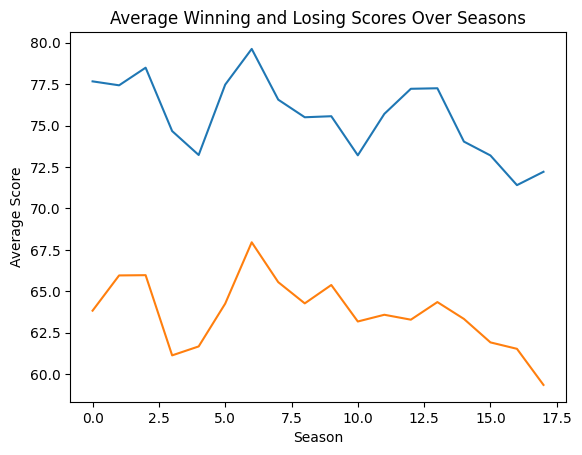

In [455]:
ppg_winner = X.groupby('season')['wscore'].mean()
ppg_loser = X.groupby('season')['lscore'].mean()
season_values = X.groupby('season').count().index.values

plt.plot(season_values, ppg_winner)
plt.plot(season_values, ppg_loser)
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.title('Average Winning and Losing Scores Over Seasons')
plt.show()

Dakle imamo linijski graf, prikazuje prosječno koliko je pobjednički i gubitnički tim imao poena po utakmici po sezoni

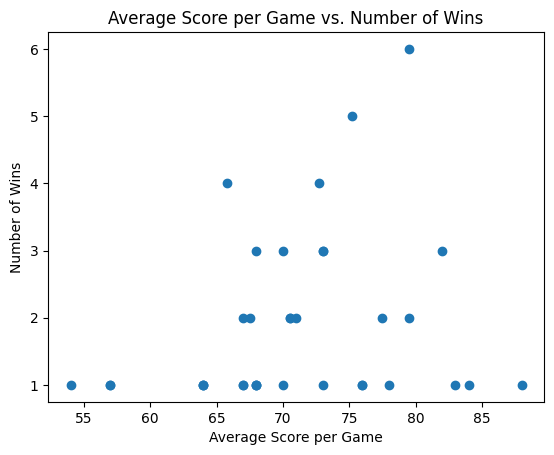

In [463]:
X =X[X.season == 17]
wins_tour = X.groupby('wteam')['name'].count()
ppg = X.groupby('wteam')['wscore'].mean()

plt.scatter(ppg, wins_tour)
plt.xlabel('Average Score per Game')
plt.ylabel('Number of Wins')
plt.title('Average Score per Game vs. Number of Wins')
plt.show()

Prikazan je graf raspršenja na kojem vidimo prosječan broj poena svake ekipe i prosječan broj pobjeda na turniru u zadnjoj sezoni

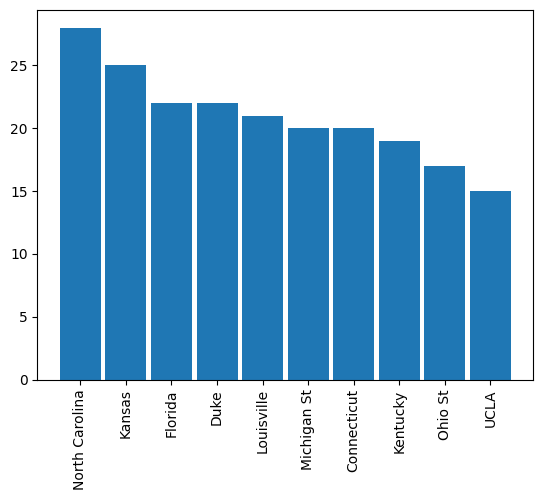

In [492]:
X = pd.merge(seasons, tourney_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')

X = X[X.season > 7]
wins = X.groupby(['wteam', 'name'])['wscore'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
wins_count = wins['count']
wins_name = wins['name']

plt.bar(wins_name, wins_count, width=0.9)
plt.xticks(rotation=90)
plt.show()

Ovdje imamo 10 najboljih timova na turnirima zadnjih 10 godina, odnosno timovi s najviše ostvarenih pobjeda

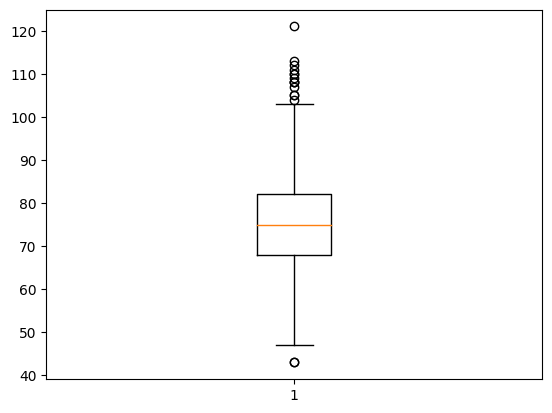

In [489]:
plt.boxplot(tourney_results['wscore'])
plt.show()

Prikazan je kutijasti graf zabijenih poena na turnirima pobjedničkih ekipa

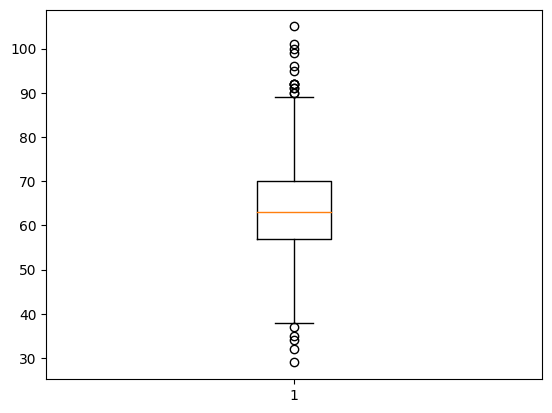

In [490]:
plt.boxplot(tourney_results['lscore'])
plt.show()

Prikazan je kutijasti graf zabijenih poena na turnirima gubitničkih ekipa

Na izgled ima dosta vrijednosti koje strše, ali to je sport, znamo da uvijek ima neočekivanih rezultata, također dosta utakmica ode u produžetke i to po nekoliko njih tako da je to sve normalno

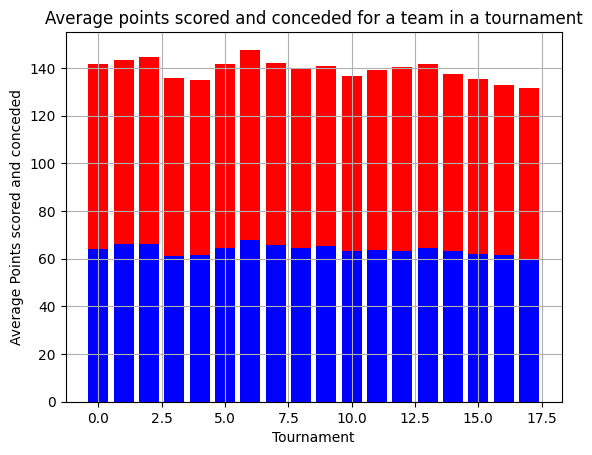

In [497]:
X = pd.merge(seasons, tourney_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')

ppg_winner = X.groupby('season')['wscore'].mean()
ppg_loser = X.groupby('season')['lscore'].mean()
season_values = X.groupby('season').count().index.values

plt.bar(season_values, ppg_loser, color='blue', label='conceded')
plt.bar(season_values, ppg_winner, color='red', label='scored',bottom=ppg_loser)
plt.xlabel('Tournament')
plt.ylabel('Average Points scored and conceded')
plt.title('Average points scored and conceded for a wteam in a tournament')
plt.grid()
plt.show()

Graf nam govori koliko u prosjeku svaki pobjednički tim zabije, a koliko primi koševa na turniru svake godine

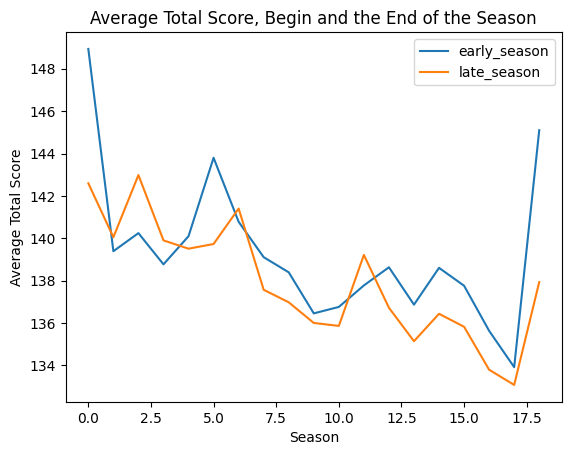

In [514]:
ppg_early_season = regular_season_results[regular_season_results['daynum'] < 30].groupby('season')['wscore'].mean() + regular_season_results[regular_season_results['daynum'] < 30].groupby('season')['lscore'].mean()
ppg_late_season = regular_season_results[regular_season_results['daynum'] > 115].groupby('season')['wscore'].mean() + regular_season_results[regular_season_results['daynum'] > 115].groupby('season')['lscore'].mean()
season_values = regular_season_results.groupby('season').count().index.values
plt.plot(season_values, ppg_early_season, label='early_season')
plt.plot(season_values, ppg_late_season, label='late_season')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.title('Average Total Score, Begin and the End of the Season')
plt.show()

Ovim linijskim grafom pokazali smo ovisnost zabijenih poena na utakmici o pocetku i kraju sezone